In [5]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt
import random 
import numpy as np
import time
from igraph import *

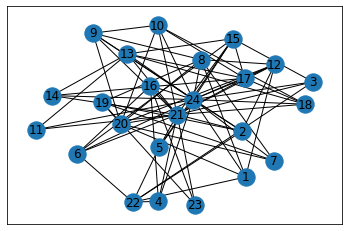

In [6]:
df=pd.read_csv('arcs.txt', sep=' ', names=['n1','n2','Weight'])
G=nx.from_pandas_edgelist(df,'n1','n2',create_using=nx.Graph)
k_pos=nx.spring_layout(G, k=2.0)
nx.draw_networkx(G,k_pos)

In [16]:
def IC(G_nx,Probability):
    new_active=True
    c=0
    while new_active==True:
        new_active=False
        for v in G_nx.nodes():
            if G_nx.nodes[v]['infected']==True and G_nx.nodes[v]['try']==False:
                
                for w in nx.neighbors(G_nx,v):
                    if G_nx.nodes[w]['infected']==False:
                        x=random.random()
                        if x<Probability:
                            G_nx.nodes[w]['infected']=True
                            new_active=True
                            c+=1
            G_nx.nodes[v]['try']=True
    return c        

In [65]:
def IC_greedy(G, P, N, k):
    num_of_iterations=20
    spread=[]
    for i in range(0,num_of_iterations,1):
        nx.set_node_attributes(G,dict((i,False) for i in G.nodes),'infected')
        nx.set_node_attributes(G,dict((i,False) for i in G.nodes),'try')
        for i in range(1, k+1):
            best_spread = 0
            best_gain = float("-inf")
            S = set([])
            for j in (N-S):
                s=IC(G,P)
                if s>best_spread:
                    best_spread , best_gain=s,j       
                S.add(best_spread)
            #spread=spread+len(S)
            
            print("Best Spread=", best_spread ,"\t With gain=",best_gain)
            print("S:",S)
        #spread=spread / num_of_iterations    
    return (S,spread)    

In [66]:
IC_greedy(G, 0.1,set(G.nodes()), 3)

Best Spread= 0 	 With gain= -inf
S: {0}
Best Spread= 0 	 With gain= -inf
S: {0}
Best Spread= 0 	 With gain= -inf
S: {0}
Best Spread= 0 	 With gain= -inf
S: {0}
Best Spread= 0 	 With gain= -inf
S: {0}
Best Spread= 0 	 With gain= -inf
S: {0}
Best Spread= 0 	 With gain= -inf
S: {0}
Best Spread= 0 	 With gain= -inf
S: {0}
Best Spread= 0 	 With gain= -inf
S: {0}
Best Spread= 0 	 With gain= -inf
S: {0}
Best Spread= 0 	 With gain= -inf
S: {0}
Best Spread= 0 	 With gain= -inf
S: {0}
Best Spread= 0 	 With gain= -inf
S: {0}
Best Spread= 0 	 With gain= -inf
S: {0}
Best Spread= 0 	 With gain= -inf
S: {0}
Best Spread= 0 	 With gain= -inf
S: {0}
Best Spread= 0 	 With gain= -inf
S: {0}
Best Spread= 0 	 With gain= -inf
S: {0}
Best Spread= 0 	 With gain= -inf
S: {0}
Best Spread= 0 	 With gain= -inf
S: {0}
Best Spread= 0 	 With gain= -inf
S: {0}
Best Spread= 0 	 With gain= -inf
S: {0}
Best Spread= 0 	 With gain= -inf
S: {0}
Best Spread= 0 	 With gain= -inf
S: {0}
Best Spread= 0 	 With gain= -inf
S: {0}


({0}, [])

In [ ]:
'''
Best Node: 24 	With gain: 11.517
S: {24}
Best Node: 19 	With gain: 1.987
S: {24, 19}
Best Node: 6 	With gain: 1.513
S: {24, 19, 6}
{6, 19, 24}
'''